In [28]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [29]:
file_path = "C:/Users/Admin/Desktop/PROJECT WORK/DROUGHT-FORECASTING-IN-KENYA-USING-MACHINE-LEARNING/Datafiles/WORKBOOKS/FINAL/CorrFile.xlsx"
sheet_name = "IODE"  

df = pd.read_excel(file_path, sheet_name=sheet_name)

df.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,VOI,WAJIR,GARISSA,LAMU,LODWAR,MOMBASA,MOYALE
0,1979,-0.031856,0.216138,-1.744325,-0.694450,0.211768,3.099123,-0.618778,-0.843518,-0.688621,-0.846724,0.490148,1.110697,0.113305,-0.311120,-0.200977,-1.224511,-0.249406,-0.530462,0.062640
1,1980,-0.663415,0.367340,-0.692498,-1.123123,1.035309,2.226249,-0.605187,-0.297520,-0.425869,-1.454225,0.736591,0.420191,-0.641006,-0.680151,-1.180739,-0.740031,-0.562060,-0.734569,-0.554230
2,1981,-0.789727,0.206688,-0.476975,-0.764597,1.354099,0.393406,-0.869241,-0.111934,0.177901,-1.254747,0.951181,-0.048710,0.386318,-0.541398,-0.894839,-0.510396,-0.898634,0.202190,-0.396922
3,1982,-0.870757,0.000135,0.379591,0.233042,0.999255,-0.134963,-0.195516,-0.780312,-0.267473,0.141599,0.594090,-0.305642,0.935584,0.810631,0.522376,-0.228696,3.206877,0.006516,0.293028
4,1983,-1.151980,-0.033615,0.158541,0.700685,-0.376476,-0.781393,-0.119795,-0.531519,1.366806,-0.388831,-0.195534,-0.878922,-1.489939,-0.690986,-1.263479,-1.161484,-0.550101,-0.768494,-0.947159


In [49]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

df_lag = df.copy()

for i, month in enumerate(months):
    if i == 0:
        df_lag[month + '_LAG1'] = df[months[-1]].shift(1)
    else:
        df_lag[month + '_LAG1'] = df[months[i - 1]]
df_lag.to_csv('lag.xlsx', index=False)
df_lag.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,...,MAR_LAG1,APR_LAG1,MAY_LAG1,JUN_LAG1,JUL_LAG1,AUG_LAG1,SEP_LAG1,OCT_LAG1,NOV_LAG1,DEC_LAG1
0,1979,-0.031856,0.216138,-1.744325,-0.694450,0.211768,3.099123,-0.618778,-0.843518,-0.688621,...,0.216138,-1.744325,-0.694450,0.211768,3.099123,-0.618778,-0.843518,-0.688621,-0.846724,0.490148
1,1980,-0.663415,0.367340,-0.692498,-1.123123,1.035309,2.226249,-0.605187,-0.297520,-0.425869,...,0.367340,-0.692498,-1.123123,1.035309,2.226249,-0.605187,-0.297520,-0.425869,-1.454225,0.736591
2,1981,-0.789727,0.206688,-0.476975,-0.764597,1.354099,0.393406,-0.869241,-0.111934,0.177901,...,0.206688,-0.476975,-0.764597,1.354099,0.393406,-0.869241,-0.111934,0.177901,-1.254747,0.951181
3,1982,-0.870757,0.000135,0.379591,0.233042,0.999255,-0.134963,-0.195516,-0.780312,-0.267473,...,0.000135,0.379591,0.233042,0.999255,-0.134963,-0.195516,-0.780312,-0.267473,0.141599,0.594090
4,1983,-1.151980,-0.033615,0.158541,0.700685,-0.376476,-0.781393,-0.119795,-0.531519,1.366806,...,-0.033615,0.158541,0.700685,-0.376476,-0.781393,-0.119795,-0.531519,1.366806,-0.388831,-0.195534


In [34]:
for month in months:
    corr = df_lag[[month + '_LAG1', 'VOI']].corr().iloc[0, 1]
    print(f"Correlation between {month}_LAG1 and VOI: {corr:.3f}")
stations = ['VOI', 'MOMBASA','GARISSA','LAMU','LODWAR','MOYALE']

for station in stations:
    print(f"\nCorrelations with {station} (1-month lag):")
    for month in months:
        if month + '_LAG1' in df_lag.columns and station in df_lag.columns:
            corr = df_lag[[month + '_LAG1', station]].corr().iloc[0, 1]
            print(f"{month}_LAG1 vs {station}: {corr:.3f}")

Correlation between JAN_LAG1 and VOI: -0.115
Correlation between FEB_LAG1 and VOI: 0.050
Correlation between MAR_LAG1 and VOI: 0.044
Correlation between APR_LAG1 and VOI: 0.003
Correlation between MAY_LAG1 and VOI: 0.110
Correlation between JUN_LAG1 and VOI: -0.122
Correlation between JUL_LAG1 and VOI: -0.140
Correlation between AUG_LAG1 and VOI: 0.209
Correlation between SEP_LAG1 and VOI: 0.134
Correlation between OCT_LAG1 and VOI: 0.007
Correlation between NOV_LAG1 and VOI: 0.147
Correlation between DEC_LAG1 and VOI: -0.079

Correlations with VOI (1-month lag):
JAN_LAG1 vs VOI: -0.115
FEB_LAG1 vs VOI: 0.050
MAR_LAG1 vs VOI: 0.044
APR_LAG1 vs VOI: 0.003
MAY_LAG1 vs VOI: 0.110
JUN_LAG1 vs VOI: -0.122
JUL_LAG1 vs VOI: -0.140
AUG_LAG1 vs VOI: 0.209
SEP_LAG1 vs VOI: 0.134
OCT_LAG1 vs VOI: 0.007
NOV_LAG1 vs VOI: 0.147
DEC_LAG1 vs VOI: -0.079

Correlations with MOMBASA (1-month lag):
JAN_LAG1 vs MOMBASA: -0.042
FEB_LAG1 vs MOMBASA: -0.081
MAR_LAG1 vs MOMBASA: -0.155
APR_LAG1 vs MOMBASA: 0.1

In [33]:
print(df_lag.columns.tolist())


['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'VOI', 'WAJIR', 'GARISSA', 'LAMU', 'LODWAR', 'MOMBASA', 'MOYALE', 'JAN_LAG1', 'FEB_LAG1', 'MAR_LAG1', 'APR_LAG1', 'MAY_LAG1', 'JUN_LAG1', 'JUL_LAG1', 'AUG_LAG1', 'SEP_LAG1', 'OCT_LAG1', 'NOV_LAG1', 'DEC_LAG1']


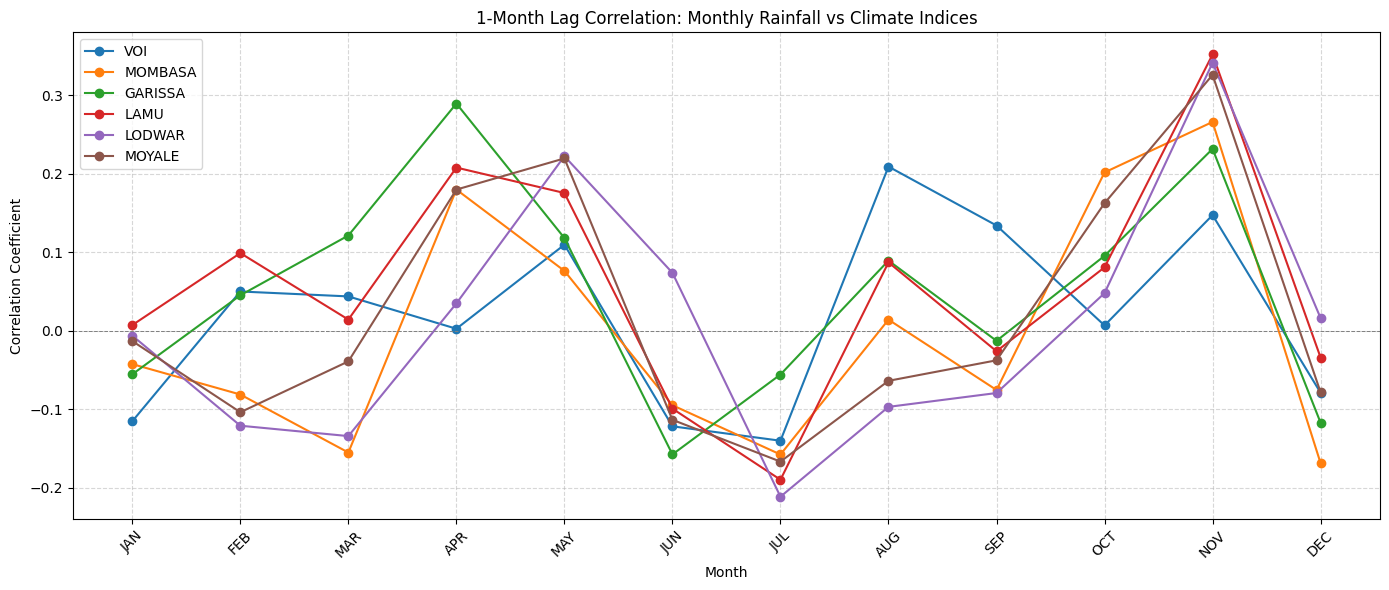

In [35]:
cor_df = pd.DataFrame(index=months, columns=stations)

for station in stations:
    for month in months:
        corr = df_lag[[month + '_LAG1', station]].corr().iloc[0, 1]
        cor_df.loc[month, station] = corr

cor_df = cor_df.astype(float)
plt.figure(figsize=(14, 6))
for station in stations:
    plt.plot(months, cor_df[station], marker='o', label=station)

plt.title('1-Month Lag Correlation: Monthly Rainfall vs Climate Indices')
plt.xlabel('Month')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [38]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

df_lag3 = df.copy()

for i, month in enumerate(months):
    if i < 3:
        df_lag3[month + '_LAG3'] = df[months[i - 3]].shift(1)
    else:
        df_lag3[month + '_LAG3'] = df[months[i - 3]]

stations = ['MOMBASA', 'VOI', 'WAJIR', 'GARISSA','LODWAR','LAMU','MOYALE']

for station in stations:
    print(f"\nCorrelations with {station} (3-month lag):")
    for month in months:
        corr = df_lag3[[month + '_LAG3', station]].corr().iloc[0, 1]
        print(f"{month}_LAG3 vs {station}: {corr:.3f}")



Correlations with MOMBASA (3-month lag):
JAN_LAG3 vs MOMBASA: 0.151
FEB_LAG3 vs MOMBASA: -0.071
MAR_LAG3 vs MOMBASA: -0.042
APR_LAG3 vs MOMBASA: -0.081
MAY_LAG3 vs MOMBASA: -0.155
JUN_LAG3 vs MOMBASA: 0.180
JUL_LAG3 vs MOMBASA: 0.076
AUG_LAG3 vs MOMBASA: -0.095
SEP_LAG3 vs MOMBASA: -0.157
OCT_LAG3 vs MOMBASA: 0.014
NOV_LAG3 vs MOMBASA: -0.075
DEC_LAG3 vs MOMBASA: 0.202

Correlations with VOI (3-month lag):
JAN_LAG3 vs VOI: 0.056
FEB_LAG3 vs VOI: 0.049
MAR_LAG3 vs VOI: -0.115
APR_LAG3 vs VOI: 0.050
MAY_LAG3 vs VOI: 0.044
JUN_LAG3 vs VOI: 0.003
JUL_LAG3 vs VOI: 0.110
AUG_LAG3 vs VOI: -0.122
SEP_LAG3 vs VOI: -0.140
OCT_LAG3 vs VOI: 0.209
NOV_LAG3 vs VOI: 0.134
DEC_LAG3 vs VOI: 0.007

Correlations with WAJIR (3-month lag):
JAN_LAG3 vs WAJIR: 0.261
FEB_LAG3 vs WAJIR: 0.046
MAR_LAG3 vs WAJIR: 0.047
APR_LAG3 vs WAJIR: -0.072
MAY_LAG3 vs WAJIR: -0.035
JUN_LAG3 vs WAJIR: 0.307
JUL_LAG3 vs WAJIR: 0.161
AUG_LAG3 vs WAJIR: -0.120
SEP_LAG3 vs WAJIR: -0.101
OCT_LAG3 vs WAJIR: -0.100
NOV_LAG3 vs WAJ

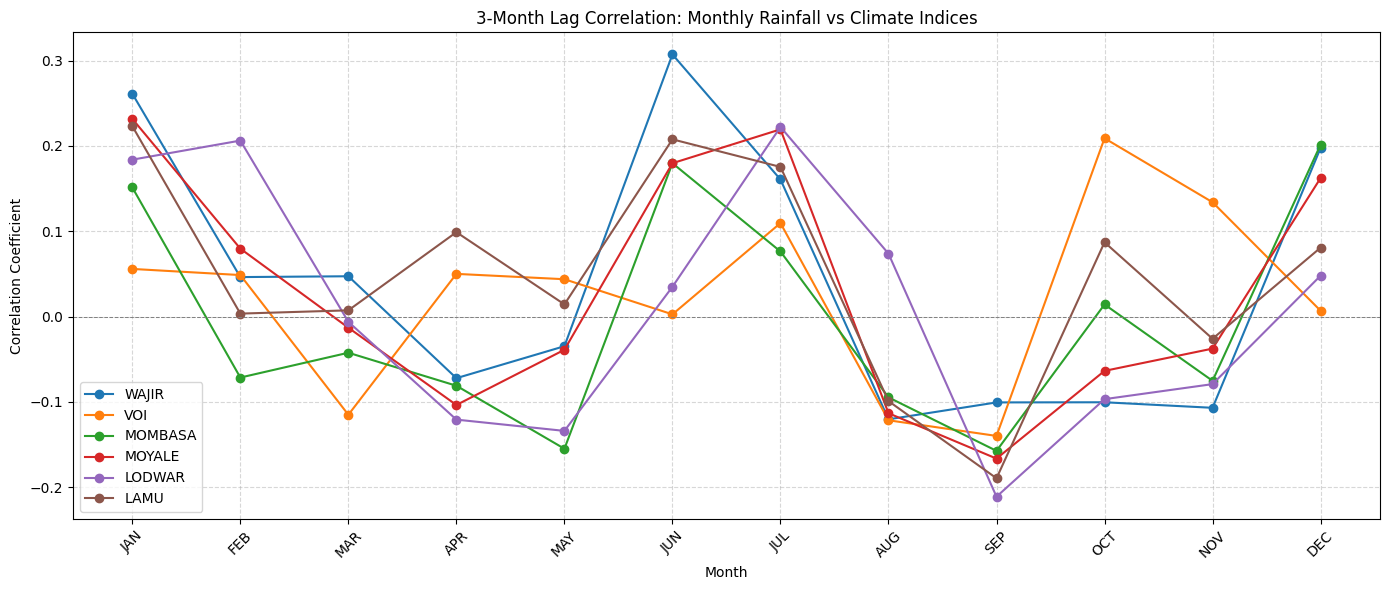

In [42]:
cor_df = pd.DataFrame(index=months, columns=stations)

for station in stations:
    for month in months:
        try:
            cor = df_lag3[[month + '_LAG3', station]].corr().iloc[0, 1]
            cor_df.loc[month, station] = cor
        except KeyError:
            cor_df.loc[month, station] = None  # Use NaN for missing columns

cor_df = cor_df.astype(float)

plt.figure(figsize=(14, 6))
for station in stations:
    plt.plot(months, cor_df[station], marker='o', label=station)

plt.title('3-Month Lag Correlation: Monthly Rainfall vs Climate Indices')
plt.xlabel('Month')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [44]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

df_lag5 = df.copy()

for i, month in enumerate(months):
    if i < 5:
        df_lag5[month + '_LAG5'] = df[months[i - 5]].shift(1)
    else:
        df_lag5[month + '_LAG5'] = df[months[i - 5]]

stations = ['WAJIR', 'LODWAR', 'LAMU', 'MOMBASA','VOI','MOYALE']

for station in stations:
    print(f"\nCorrelations with {station} (5-month lag):")
    for month in months:
        corr = df_lag5[[month + '_LAG5', station]].corr().iloc[0, 1]
        print(f"{month}_LAG5 vs {station}: {corr:.3f}")



Correlations with WAJIR (5-month lag):
JAN_LAG5 vs WAJIR: -0.249
FEB_LAG5 vs WAJIR: 0.231
MAR_LAG5 vs WAJIR: 0.261
APR_LAG5 vs WAJIR: 0.046
MAY_LAG5 vs WAJIR: 0.047
JUN_LAG5 vs WAJIR: -0.072
JUL_LAG5 vs WAJIR: -0.035
AUG_LAG5 vs WAJIR: 0.307
SEP_LAG5 vs WAJIR: 0.161
OCT_LAG5 vs WAJIR: -0.120
NOV_LAG5 vs WAJIR: -0.101
DEC_LAG5 vs WAJIR: -0.100

Correlations with LODWAR (5-month lag):
JAN_LAG5 vs LODWAR: -0.139
FEB_LAG5 vs LODWAR: 0.120
MAR_LAG5 vs LODWAR: 0.184
APR_LAG5 vs LODWAR: 0.206
MAY_LAG5 vs LODWAR: -0.006
JUN_LAG5 vs LODWAR: -0.121
JUL_LAG5 vs LODWAR: -0.134
AUG_LAG5 vs LODWAR: 0.035
SEP_LAG5 vs LODWAR: 0.222
OCT_LAG5 vs LODWAR: 0.074
NOV_LAG5 vs LODWAR: -0.211
DEC_LAG5 vs LODWAR: -0.097

Correlations with LAMU (5-month lag):
JAN_LAG5 vs LAMU: -0.103
FEB_LAG5 vs LAMU: 0.214
MAR_LAG5 vs LAMU: 0.223
APR_LAG5 vs LAMU: 0.003
MAY_LAG5 vs LAMU: 0.007
JUN_LAG5 vs LAMU: 0.099
JUL_LAG5 vs LAMU: 0.014
AUG_LAG5 vs LAMU: 0.208
SEP_LAG5 vs LAMU: 0.175
OCT_LAG5 vs LAMU: -0.099
NOV_LAG5 vs LA

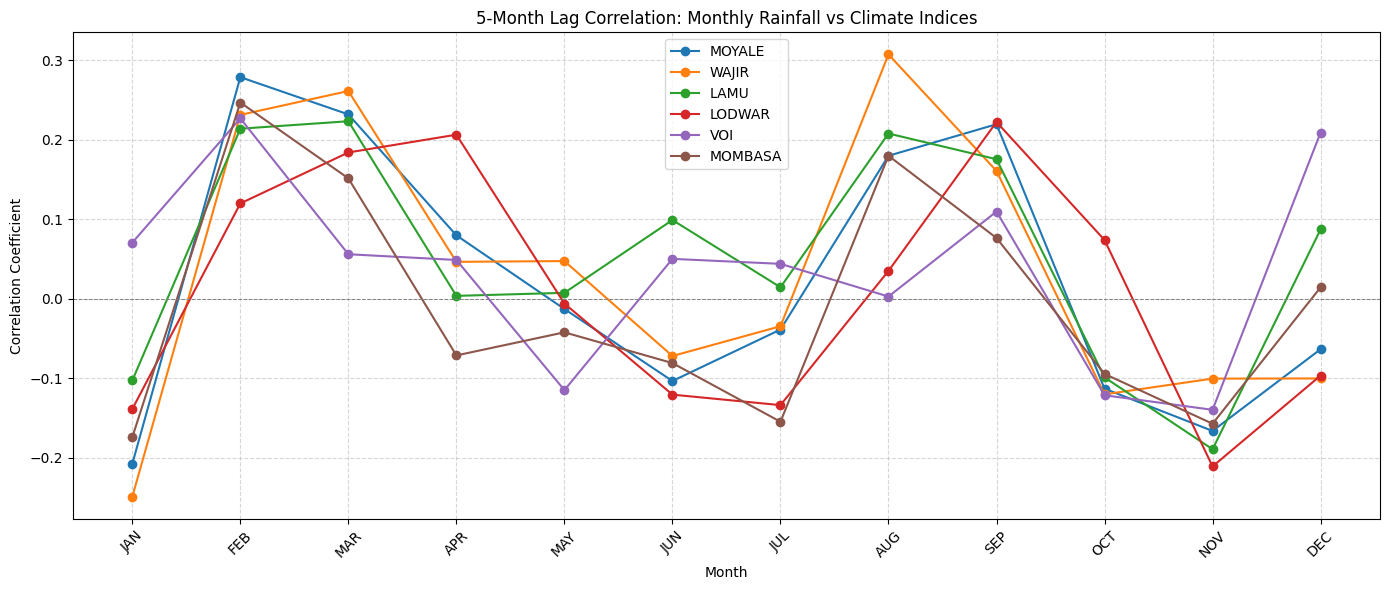

In [46]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
stations = ['MOYALE', 'WAJIR', 'LAMU', 'LODWAR','VOI','MOMBASA']

cor_df_5lag = pd.DataFrame(index=months, columns=stations)

for station in stations:
    for month in months:
        try:
            corr = df_lag5[[month + '_LAG5', station]].corr().iloc[0, 1]
            cor_df_5lag.loc[month, station] = corr
        except KeyError:
            cor_df_5lag.loc[month, station] = None

cor_df_5lag = cor_df_5lag.astype(float)

plt.figure(figsize=(14, 6))
for station in stations:
    plt.plot(months, cor_df_5lag[station], marker='o', label=station)

plt.title('5-Month Lag Correlation: Monthly Rainfall vs Climate Indices')
plt.xlabel('Month')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
